<a href="https://colab.research.google.com/github/Parsival1/Analisis_de_datos/blob/main/Taller%202%20-%20Procesamiento%20de%20datos/Procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Gestio de librerias***#

Esta seccion se cargar e importa todo lo necesario para manipular los datos, hacer operaciones y graficas.

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
!pip install pandas-profiling
from pandas_profiling import ProfileReport

#***Carga y union de archivos***#

Esta seccion se encarga de unir los datos de los 2 archivos en 1 solo y exportarlo para poder trabajar adecuadamente

In [ ]:
# Cargar los datos de ambos archivos
datos_1 = pd.read_excel('DatosP01.xlsx')
datos_2 = pd.read_excel('DatosP02.xlsx')

# Unir los datos basados en la columna "Id", especificando qué columnas incluir
datos_unidos = pd.merge(datos_1, datos_2[['Id','Tipo de Colegio', 'Uso_LMS', 'Asistencia', 'Entregas_Completas', 'Sistemas','Matematicas', 'Ingles', 'Comunicación']], on='Id')

# Guardar los datos unidos en un nuevo archivo de Excel
datos_unidos.to_excel('Dataset_final.xlsx', index=False)

#***Lectura del Dataset***#

Esta seccion se encarga de leer el dataset con el cual se va a trabajar

In [ ]:
dataset = pd.read_excel('Dataset_final.xlsx')
dataset

,Id,Nombre,Sexo,FechaNacimiento,Estrato,Trabaja,Enfermedad,Ubicacion,Tipo de Colegio,Uso_LMS,Asistencia,Entregas_Completas,Sistemas,Matematicas,Ingles,Comunicación
0,AB001,Ana Gomez,F,1987-05-13,3,NO,SI,Copacabana,Comercial,BAJA,0.10,0.45,5.0,4.9,4.6,5.0
1,AB002,Ana Perez,F,1980-03-23,3,NO,SI,Medellin,Tecnico,BAJA,0.10,0.45,3.5,4.5,4.5,4.8
2,AB003,Alberto Arenas,M,1988-05-23,4,NO,NO,Sabaneta,Comercial,BAJA,0.10,0,4.5,3.6,3.5,2.6
3,AB004,Alberto Zapata,M,1987-05-13,4,NO,NO,Copacabana,Agropecuario,baja,0.10,0,2.6,5.0,3.3,3.5
4,AB005,Ana Sánchez,Femenino,1990-11-09,4,0,0,0,0,0,0.00,0,4.7,2.5,5.0,4.7
5,AB006,Carmen Carrascal,F,1988-06-12,2,NO,SI,Bello,Academico,MEDIA,0.65,0.85,2.6,4.6,3.6,5.0
6,AB007,Carmen Reyes,F,1991-09-09,2,NO,SI,Itagui,Comercial,MEDIA,0.65,0.85,1.6,3.5,4.7,3.7
7,AB008,Cristina Carrillo,F,1988-06-12,3,no,NO,Envigado,Tecnico,MEDIA,0.90,0.8,5.0,4.5,1.4,1.8
8,AB009,Cristina Sanchez,F,1980-04-23,3,NO,NO,Itagui,Comercial,MEDIA,0.90,0.8,5.0,3.7,4.2,5.0
9,AB010,Diego López,M,1988-06-12,3,0,0,0,0,0,0.00,0,2.6,5.0,3.3,3.5


#***Descripcion estadistica inicial***#

Esta sección se encarga de dar un informe inicial de los datos del dataset, aun no se han modificado. Esto sirve para analizar mejor la informacion y poder tomar deciciones de qué hacer con ella.

In [ ]:
#obtener informacion del dataset
dataset.info()
dataset.describe()

Este bloque hace un reporte estadistico y lo exporta en un archivo html el cual se puede abrir y visualizar en el navegador

In [ ]:
#Reporte estadistico del dataset
reporte = ProfileReport(dataset)
reporte.to_file(output_file='Reporte.html')

#***Limpieza de datos***#

Todo esta sección se encarga de hacer eliminacion y tranformacion de variables irrelevante, redundantes o nulas. En este caso no se elimino nada, se mantuvo todo el dataset, lo que se hizo fue transormar y completar los campos.

##***Estandarizacion de ortografia***##

Esta subsección se encarga de estandarizar la ortografia de los datos en la tabla, en mi caso puse la primera letra mayusula y el resto minuscula en cuanto a las palabras, esto con el fin de brindar mayor entendimiento y estetica al dataset.

In [ ]:
#Estandarizar ortografia de genero Masculino
dataset.loc[dataset['Sexo'] == 'M','Sexo'] = 'Masculino'

#Estandarizar ortografia de genero Femenino
dataset.loc[dataset['Sexo'] == 'F','Sexo'] = 'Femenino'
dataset.loc[dataset['Sexo'] == 'Mujer','Sexo'] = 'Femenino'
dataset

,Id,Nombre,Sexo,FechaNacimiento,Estrato,Trabaja,Enfermedad,Ubicacion,Tipo de Colegio,Uso_LMS,Asistencia,Entregas_Completas,Sistemas,Matematicas,Ingles,Comunicación
0,AB001,Ana Gomez,Femenino,1987-05-13,3,NO,SI,Copacabana,Comercial,BAJA,0.10,0.45,5.0,4.9,4.6,5.0
1,AB002,Ana Perez,Femenino,1980-03-23,3,NO,SI,Medellin,Tecnico,BAJA,0.10,0.45,3.5,4.5,4.5,4.8
2,AB003,Alberto Arenas,Masculino,1988-05-23,4,NO,NO,Sabaneta,Comercial,BAJA,0.10,0,4.5,3.6,3.5,2.6
3,AB004,Alberto Zapata,Masculino,1987-05-13,4,NO,NO,Copacabana,Agropecuario,baja,0.10,0,2.6,5.0,3.3,3.5
4,AB005,Ana Sánchez,Femenino,1990-11-09,4,0,0,0,0,0,0.00,0,4.7,2.5,5.0,4.7
5,AB006,Carmen Carrascal,Femenino,1988-06-12,2,NO,SI,Bello,Academico,MEDIA,0.65,0.85,2.6,4.6,3.6,5.0
6,AB007,Carmen Reyes,Femenino,1991-09-09,2,NO,SI,Itagui,Comercial,MEDIA,0.65,0.85,1.6,3.5,4.7,3.7
7,AB008,Cristina Carrillo,Femenino,1988-06-12,3,no,NO,Envigado,Tecnico,MEDIA,0.90,0.8,5.0,4.5,1.4,1.8
8,AB009,Cristina Sanchez,Femenino,1980-04-23,3,NO,NO,Itagui,Comercial,MEDIA,0.90,0.8,5.0,3.7,4.2,5.0
9,AB010,Diego López,Masculino,1988-06-12,3,0,0,0,0,0,0.00,0,2.6,5.0,3.3,3.5


In [ ]:
#estandarizar la ortografia de la columna 'Trabaja'
#'NO'
dataset.loc[dataset['Trabaja'] == 'NO','Trabaja'] = 'No'
dataset.loc[dataset['Trabaja'] == 'no','Trabaja'] = 'No'
#'SI'
dataset.loc[dataset['Trabaja'] == 'SI','Trabaja'] = 'Si'
dataset

,Id,Nombre,Sexo,FechaNacimiento,Estrato,Trabaja,Enfermedad,Ubicacion,Tipo de Colegio,Uso_LMS,Asistencia,Entregas_Completas,Sistemas,Matematicas,Ingles,Comunicación
0,AB001,Ana Gomez,Femenino,1987-05-13,3,No,SI,Copacabana,Comercial,BAJA,0.10,0.45,5.0,4.9,4.6,5.0
1,AB002,Ana Perez,Femenino,1980-03-23,3,No,SI,Medellin,Tecnico,BAJA,0.10,0.45,3.5,4.5,4.5,4.8
2,AB003,Alberto Arenas,Masculino,1988-05-23,4,No,NO,Sabaneta,Comercial,BAJA,0.10,0,4.5,3.6,3.5,2.6
3,AB004,Alberto Zapata,Masculino,1987-05-13,4,No,NO,Copacabana,Agropecuario,baja,0.10,0,2.6,5.0,3.3,3.5
4,AB005,Ana Sánchez,Femenino,1990-11-09,4,0,0,0,0,0,0.00,0,4.7,2.5,5.0,4.7
5,AB006,Carmen Carrascal,Femenino,1988-06-12,2,No,SI,Bello,Academico,MEDIA,0.65,0.85,2.6,4.6,3.6,5.0
6,AB007,Carmen Reyes,Femenino,1991-09-09,2,No,SI,Itagui,Comercial,MEDIA,0.65,0.85,1.6,3.5,4.7,3.7
7,AB008,Cristina Carrillo,Femenino,1988-06-12,3,No,NO,Envigado,Tecnico,MEDIA,0.90,0.8,5.0,4.5,1.4,1.8
8,AB009,Cristina Sanchez,Femenino,1980-04-23,3,No,NO,Itagui,Comercial,MEDIA,0.90,0.8,5.0,3.7,4.2,5.0
9,AB010,Diego López,Masculino,1988-06-12,3,0,0,0,0,0,0.00,0,2.6,5.0,3.3,3.5


In [ ]:
#Estandarizar la ortografia de la columna 'Enfermedad'
#'NO'
dataset.loc[dataset['Enfermedad'] == 'NO','Enfermedad'] = 'No'
dataset.loc[dataset['Enfermedad'] == 'no','Enfermedad'] = 'No'
#'SI'
dataset.loc[dataset['Enfermedad'] == 'SI','Enfermedad'] = 'Si'
dataset

,Id,Nombre,Sexo,FechaNacimiento,Estrato,Trabaja,Enfermedad,Ubicacion,Tipo de Colegio,Uso_LMS,Asistencia,Entregas_Completas,Sistemas,Matematicas,Ingles,Comunicación
0,AB001,Ana Gomez,Femenino,1987-05-13,3,No,Si,Copacabana,Comercial,BAJA,0.10,0.45,5.0,4.9,4.6,5.0
1,AB002,Ana Perez,Femenino,1980-03-23,3,No,Si,Medellin,Tecnico,BAJA,0.10,0.45,3.5,4.5,4.5,4.8
2,AB003,Alberto Arenas,Masculino,1988-05-23,4,No,No,Sabaneta,Comercial,BAJA,0.10,0,4.5,3.6,3.5,2.6
3,AB004,Alberto Zapata,Masculino,1987-05-13,4,No,No,Copacabana,Agropecuario,baja,0.10,0,2.6,5.0,3.3,3.5
4,AB005,Ana Sánchez,Femenino,1990-11-09,4,0,0,0,0,0,0.00,0,4.7,2.5,5.0,4.7
5,AB006,Carmen Carrascal,Femenino,1988-06-12,2,No,Si,Bello,Academico,MEDIA,0.65,0.85,2.6,4.6,3.6,5.0
6,AB007,Carmen Reyes,Femenino,1991-09-09,2,No,Si,Itagui,Comercial,MEDIA,0.65,0.85,1.6,3.5,4.7,3.7
7,AB008,Cristina Carrillo,Femenino,1988-06-12,3,No,No,Envigado,Tecnico,MEDIA,0.90,0.8,5.0,4.5,1.4,1.8
8,AB009,Cristina Sanchez,Femenino,1980-04-23,3,No,No,Itagui,Comercial,MEDIA,0.90,0.8,5.0,3.7,4.2,5.0
9,AB010,Diego López,Masculino,1988-06-12,3,0,0,0,0,0,0.00,0,2.6,5.0,3.3,3.5


In [ ]:
#Estandarizar ortografia de la columna 'Uso_LMS'
dataset.loc[dataset['Uso_LMS'] == 'BAJA','Uso_LMS'] = 'Baja'
dataset.loc[dataset['Uso_LMS'] == 'MEDIA','Uso_LMS'] = 'Media'
dataset.loc[dataset['Uso_LMS'] == 'ALTA','Uso_LMS'] = 'Alta'
dataset.loc[dataset['Uso_LMS'] == 'baja','Uso_LMS'] = 'Baja'
dataset.loc[dataset['Uso_LMS'] == 'media','Uso_LMS'] = 'Media'
dataset.loc[dataset['Uso_LMS'] == 'alta','Uso_LMS'] = 'Alta'
dataset

,Id,Nombre,Sexo,FechaNacimiento,Estrato,Trabaja,Enfermedad,Ubicacion,Tipo de Colegio,Uso_LMS,Asistencia,Entregas_Completas,Sistemas,Matematicas,Ingles,Comunicación
0,AB001,Ana Gomez,Femenino,1987-05-13,3,No,Si,Copacabana,Comercial,Baja,0.10,0.45,5.0,4.9,4.6,5.0
1,AB002,Ana Perez,Femenino,1980-03-23,3,No,Si,Medellin,Tecnico,Baja,0.10,0.45,3.5,4.5,4.5,4.8
2,AB003,Alberto Arenas,Masculino,1988-05-23,4,No,No,Sabaneta,Comercial,Baja,0.10,0,4.5,3.6,3.5,2.6
3,AB004,Alberto Zapata,Masculino,1987-05-13,4,No,No,Copacabana,Agropecuario,Baja,0.10,0,2.6,5.0,3.3,3.5
4,AB005,Ana Sánchez,Femenino,1990-11-09,4,0,0,0,0,0,0.00,0,4.7,2.5,5.0,4.7
5,AB006,Carmen Carrascal,Femenino,1988-06-12,2,No,Si,Bello,Academico,Media,0.65,0.85,2.6,4.6,3.6,5.0
6,AB007,Carmen Reyes,Femenino,1991-09-09,2,No,Si,Itagui,Comercial,Media,0.65,0.85,1.6,3.5,4.7,3.7
7,AB008,Cristina Carrillo,Femenino,1988-06-12,3,No,No,Envigado,Tecnico,Media,0.90,0.8,5.0,4.5,1.4,1.8
8,AB009,Cristina Sanchez,Femenino,1980-04-23,3,No,No,Itagui,Comercial,Media,0.90,0.8,5.0,3.7,4.2,5.0
9,AB010,Diego López,Masculino,1988-06-12,3,0,0,0,0,0,0.00,0,2.6,5.0,3.3,3.5


##***Analisis, comprencion y transformacion de valores nulos***##

Esta subsección se encarga de analizar los campos "nulos" que hay en el dataset junto con otros campos para poder completar dicha informacion.
Aqui se hacen operaciones de estadistica base como sacar moda y media y  hacer agrupacion de datos.
(coloco el nulos entre comillas ya que el dataset no muestra tener valores nulos en el informe estadistico, pero hay datos 0 en 8 columnas entre las cuales hay columnas categoricas y columnas numericas)

In [ ]:
#Completar valores "nulos" de la columna 'Ubicacion'
#Conteo de los datos, cuantas veces se repite cada dato en la columna 'Ubicacion'
conteo = dataset['Ubicacion'].value_counts()
print(conteo)
#Despues del analisis se remplazan los valores '0' por la moda
dataset.loc[dataset['Ubicacion'] == 0,'Ubicacion'] = moda = dataset['Ubicacion'].mode()[0]

Medellin       10
0               8
Itagui          4
Copacabana      3
Sabaneta        3
Bello           3
Envigado        3
La estrella     3
Barbosa         3
Name: Ubicacion, dtype: int64


***Podemos ver que con diferencia Medellin es la moda***

###***Completar valores "nulos" de la columna 'Tipo de Colegio'***###

En este caso, para poder completar los campos "nulos" de la columna 'Tipo de Colegio', lo que se hizo fue analisar varias cosas:

## Analisis 1 ##
- Se vio que la ciudad a la que pertenecen todos los valores "nulos" en la columna 'Tipo de Colegio' coiciden con Medellín.

## Analisis 2 ##

- A continuacion se consultó la cantidad de cada uno de los tipos de colegios en Medellin a los que pertenecian los aprendices segun los datos de la tabla, en este caso cuántos colegios tecnicos, cuántos agropecuarios, cuántos academicos y cuántos comerciales para saber su moda, la cual fue 'Tecnicos' .

## Analisis 3 ##

- despues de esto, se hizo una agrupacion entre la columna 'Estrato' y 'Tipo de Colegio' para saber cual era el estrato moda entre esos valores "nulos", el cual fue el estrato 3.

## Analisis 4 ##

- Para finalizar, se hizo una ultima agrupacion entre las columnas 'Ubicacion', 'Tipo de Colegio' y 'Estrato'.
Revisando la informacion, podemos ver que todas las personas de estrato 3 que viven en medellin vienen de colegios tecnicos.

## Conclucion ##

Con estos analisis y agrupaciones se puede confirmar que la mejor opcion para llenar los campos "nulos" en la columna 'Tipos de Colegio' seria 'Tecnico'.

###***Analisis 1***###

In [ ]:
# Filtra los datos por el tipo de colegio con valor 0
Tipo_nulos = dataset[dataset['Tipo de Colegio'] == 0]

# Obtiene las ciudades (Ubicaciones) correspondientes a esos valores '0'
Ciudad_tipo_nulos = Tipo_nulos['Ubicacion'].unique()

print("Las ciudades correspondientes a los valores nulos en la columna 'Tipo de Colegio': ", Ciudad_tipo_nulos)

Las ciudades correspondientes a los valores nulos en la columna 'Tipo de Colegio':  ['Medellin']


###***Analisis 2***###

In [ ]:
print("----------Agrupaciones de datos para saber cuantos aprendices vienen de cada tipo de colegio en Medellin---------")
#Agrupacion de datos para saber cuantos aprendices vienen de colegios tecnicos en Medellin
conteoM = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Tecnico')]
conteoM1 = conteoM['Tipo de Colegio'].value_counts()
print("Medellin ",conteoM1)
print("")
#Agrupacion de datos para saber cuantos aprendices vienen de colegios Comerciales en Medellin
conteoM = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Comercial')]
conteoM2 = conteoM['Tipo de Colegio'].value_counts()
print("Medellin",conteoM2)
print("")
#Agrupacion de datos para saber cuantos aprendices vienen de colegios Agropecuarios en Medellin
conteoM = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Agropecuario')]
conteoM3 = conteoM['Tipo de Colegio'].value_counts()
print("Medellin",conteoM3,"\n")
print("")
#Agrupacion de datos para saber cuantos aprendices vienen de colegios Academicos en Medellin
conteoM = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Academico')]
conteoM4 = conteoM['Tipo de Colegio'].value_counts()
print("Medellin",conteoM4,"\n")

----------Agrupaciones de datos para saber cuantos aprendices vienen de cada tipo de colegio en Medellin---------
Medellin  Tecnico    12
Name: Tipo de Colegio, dtype: int64

Medellin Comercial    2
Name: Tipo de Colegio, dtype: int64

Medellin Agropecuario    1
Name: Tipo de Colegio, dtype: int64 


Medellin Academico    3
Name: Tipo de Colegio, dtype: int64 



###***Analisis 3***###

In [ ]:
#Agrupacion de datos para saber cuantas personas de estrato 1 pertenecen al los valores nulos
print("----------Estrato 1----------")
CTME2 = dataset[(dataset['Estrato'] == 1) & (dataset['Tipo de Colegio'] == 0)]
CTME2C = CTME2.shape[0]
print("Personas de estrato 1 que estan entre los valores nulos: ", CTME2C)
#Agrupacion de datos para saber cuantas personas de estrato 3 pertenecen al los valores nulos
print("----------Estrato 2----------")
CTME2 = dataset[(dataset['Estrato'] == 2) & (dataset['Tipo de Colegio'] == 0)]
CTME2C = CTME2.shape[0]
print("Personas de estrato 2 que estan entre los valores nulos: ", CTME2C)
#Agrupacion de datos para saber cuantas personas de estrato 3 pertenecen al los valores nulos
print("----------Estrato 3----------")
CTME2 = dataset[(dataset['Estrato'] == 3) & (dataset['Tipo de Colegio'] == 0)]
CTME2C = CTME2.shape[0]
print("Personas de estrato 3 que estan entre los valores nulos: ", CTME2C)
#Agrupacion de datos para saber cuantas personas de estrato 4 pertenecen al los valores nulos
print("----------Estrato 4----------")
CTME2 = dataset[(dataset['Estrato'] == 4) & (dataset['Tipo de Colegio'] == 0)]
CTME2C = CTME2.shape[0]
print("Personas de estrato 4 que estan entre los valores nulos: ", CTME2C)

----------Estrato 1----------
Personas de estrato 1 que estan entre los valores nulos:  1
----------Estrato 2----------
Personas de estrato 2 que estan entre los valores nulos:  2
----------Estrato 3----------
Personas de estrato 3 que estan entre los valores nulos:  3
----------Estrato 4----------
Personas de estrato 4 que estan entre los valores nulos:  2


###***Analisis 4***###

In [ ]:
#CTME1 = ConteoTecnicosMedellinEstrato1
#CTME1C = ConteoTecnicosMedellinEstrato1Conteo
#Agrupacion para saber cuantas personas que vienen de medellin y vienen de colegios tecnicos pertencenen al estrato 1
print("-----------TECNICOS-------")
CTME1 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Tecnico') & (dataset['Estrato'] == 1)]
CTME1C = CTME1.shape[0]
print("Colegios técnicos en Medellín con estrato 1:", CTME1C)

#Agrupacion para saber cuantas personas que vienen de medellin y vienen de colegios tecnicos pertencenen al estrato 2
CTME2 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Tecnico') & (dataset['Estrato'] == 2)]
CTME2C = CTME2.shape[0]
print("Colegios técnicos en Medellín con estrato 2:", CTME2C)

#Agrupacion para saber cuantas personas que vienen de medellin y vienen de colegios tecnicos pertencenen al estrato 3
CTME3 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Tecnico') & (dataset['Estrato'] == 3)]
CTME3C = CTME3.shape[0]
print("Colegios técnicos en Medellín con estrato 3:", CTME3C)

#Agrupacion para saber cuantas personas que vienen de medellin y vienen de colegios tecnicos pertencenen al estrato 4
CTME4 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Tecnico') & (dataset['Estrato'] == 4)]
CTME4C = CTME4.shape[0]
print("Colegios técnicos en Medellín con estrato 4:", CTME4C)

#De aqui en adelante es lo mismo que lo anterior pero con los direntes tipos de colegio
print("-----------COMERCIALES-------")
CTME1 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Comercial') & (dataset['Estrato'] == 1)]
CTME1C = CTME1.shape[0]
print("Colegios Comercial en Medellín con estrato 1:", CTME1C)
CTME2 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Comercial') & (dataset['Estrato'] == 2)]
CTME2C = CTME2.shape[0]
print("Colegios Comercial en Medellín con estrato 2:", CTME2C)
CTME3 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Comercial') & (dataset['Estrato'] == 3)]
CTME3C = CTME3.shape[0]
print("Colegios Comercial en Medellín con estrato 3:", CTME3C)
CTME4 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Comercial') & (dataset['Estrato'] == 4)]
CTME4C = CTME4.shape[0]
print("Colegios Comercial en Medellín con estrato 4:", CTME4C)

print("-----------AGROPECUARIOS-------")
CTME1 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Agropecuario') & (dataset['Estrato'] == 1)]
CTME1C = CTME1.shape[0]
print("Colegios Agropecuario en Medellín con estrato 1:", CTME1C)
CTME2 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Agropecuario') & (dataset['Estrato'] == 2)]
CTME2C = CTME2.shape[0]
print("Colegios Agropecuario en Medellín con estrato 2:", CTME2C)
CTME3 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Agropecuario') & (dataset['Estrato'] == 3)]
CTME3C = CTME3.shape[0]
print("Colegios Agropecuario en Medellín con estrato 3:", CTME3C)
CTME4 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Agropecuario') & (dataset['Estrato'] == 4)]
CTME4C = CTME4.shape[0]
print("Colegios Agropecuario en Medellín con estrato 4:", CTME4C)

print("-----------ACADEMICOS-------")
CTME1 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Academico') & (dataset['Estrato'] == 1)]
CTME1C = CTME1.shape[0]
print("Colegios Academico en Medellín con estrato 1:", CTME1C)
CTME2 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Academico') & (dataset['Estrato'] == 2)]
CTME2C = CTME2.shape[0]
print("Colegios Academico en Medellín con estrato 2:", CTME2C)
CTME3 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Academico') & (dataset['Estrato'] == 3)]
CTME3C = CTME3.shape[0]
print("Colegios Academico en Medellín con estrato 3:", CTME3C)
CTME4 = dataset[(dataset['Ubicacion'] == 'Medellin') & (dataset['Tipo de Colegio'] == 'Academico') & (dataset['Estrato'] == 4)]
CTME4C = CTME4.shape[0]
print("Colegios Academico en Medellín con estrato 4:", CTME4C)

-----------TECNICOS-------
Colegios técnicos en Medellín con estrato 1: 0
Colegios técnicos en Medellín con estrato 2: 1
Colegios técnicos en Medellín con estrato 3: 2
Colegios técnicos en Medellín con estrato 4: 1
-----------COMERCIALES-------
Colegios Comercial en Medellín con estrato 1: 0
Colegios Comercial en Medellín con estrato 2: 2
Colegios Comercial en Medellín con estrato 3: 0
Colegios Comercial en Medellín con estrato 4: 0
-----------AGROPECUARIOS-------
Colegios Agropecuario en Medellín con estrato 1: 0
Colegios Agropecuario en Medellín con estrato 2: 0
Colegios Agropecuario en Medellín con estrato 3: 0
Colegios Agropecuario en Medellín con estrato 4: 1
-----------ACADEMICOS-------
Colegios Academico en Medellín con estrato 1: 0
Colegios Academico en Medellín con estrato 2: 3
Colegios Academico en Medellín con estrato 3: 0
Colegios Academico en Medellín con estrato 4: 0


###***Transformacion de valores nulos restantes***###


Esta pequeña sección es la que se encarga de llenar los los valores nulos restantes del dataset del dataset, utilice moda y media.

####***Remplazo por moda***####

In [ ]:
#Columna Trabaja
#Cambiar valores '0' de la columna 'Trabaja' por la moda
dataset.loc[dataset['Trabaja'] == 0,'Trabaja'] = moda = dataset['Trabaja'].mode()[0]

In [ ]:
#Columna Enfermedad
#Cambiar valores '0' de la columna 'Enfermedad' por la moda
dataset.loc[dataset['Enfermedad'] == 0,'Enfermedad'] = moda = dataset['Enfermedad'].mode()[0]

In [ ]:
#Columna Tipo de colegio
#Cambiar valores nulos de la columna 'Tipo de Colegio' por 'Tecnico'
dataset.loc[dataset['Tipo de Colegio'] == 0,'Tipo de Colegio'] = 'Tecnico'
dataset

,Id,Nombre,Sexo,FechaNacimiento,Estrato,Trabaja,Enfermedad,Ubicacion,Tipo de Colegio,Uso_LMS,Asistencia,Entregas_Completas,Sistemas,Matematicas,Ingles,Comunicación
0,AB001,Ana Gomez,Femenino,1987-05-13,3,No,Si,Copacabana,Comercial,Baja,0.10,0.45,5.0,4.9,4.6,5.0
1,AB002,Ana Perez,Femenino,1980-03-23,3,No,Si,Medellin,Tecnico,Baja,0.10,0.45,3.5,4.5,4.5,4.8
2,AB003,Alberto Arenas,Masculino,1988-05-23,4,No,No,Sabaneta,Comercial,Baja,0.10,0,4.5,3.6,3.5,2.6
3,AB004,Alberto Zapata,Masculino,1987-05-13,4,No,No,Copacabana,Agropecuario,Baja,0.10,0,2.6,5.0,3.3,3.5
4,AB005,Ana Sánchez,Femenino,1990-11-09,4,No,No,Medellin,Tecnico,0,0.00,0,4.7,2.5,5.0,4.7
5,AB006,Carmen Carrascal,Femenino,1988-06-12,2,No,Si,Bello,Academico,Media,0.65,0.85,2.6,4.6,3.6,5.0
6,AB007,Carmen Reyes,Femenino,1991-09-09,2,No,Si,Itagui,Comercial,Media,0.65,0.85,1.6,3.5,4.7,3.7
7,AB008,Cristina Carrillo,Femenino,1988-06-12,3,No,No,Envigado,Tecnico,Media,0.90,0.8,5.0,4.5,1.4,1.8
8,AB009,Cristina Sanchez,Femenino,1980-04-23,3,No,No,Itagui,Comercial,Media,0.90,0.8,5.0,3.7,4.2,5.0
9,AB010,Diego López,Masculino,1988-06-12,3,No,No,Medellin,Tecnico,0,0.00,0,2.6,5.0,3.3,3.5


In [ ]:
#Columna de Uso_LMS
#Conteo de los datos, cuantas veces se repite cada dato en la columna 'Uso_LMS'
conteo = dataset['Uso_LMS'].value_counts()
print(conteo)
#Despues del analisis se remplazan los valores '0' por la moda
dataset.loc[dataset['Uso_LMS'] == 0,'Uso_LMS'] = moda = dataset['Uso_LMS'].mode()[0]
dataset

Media    12
Baja     10
Alta     10
0         8
Name: Uso_LMS, dtype: int64


,Id,Nombre,Sexo,FechaNacimiento,Estrato,Trabaja,Enfermedad,Ubicacion,Tipo de Colegio,Uso_LMS,Asistencia,Entregas_Completas,Sistemas,Matematicas,Ingles,Comunicación
0,AB001,Ana Gomez,Femenino,1987-05-13,3,No,Si,Copacabana,Comercial,Baja,0.10,0.45,5.0,4.9,4.6,5.0
1,AB002,Ana Perez,Femenino,1980-03-23,3,No,Si,Medellin,Tecnico,Baja,0.10,0.45,3.5,4.5,4.5,4.8
2,AB003,Alberto Arenas,Masculino,1988-05-23,4,No,No,Sabaneta,Comercial,Baja,0.10,0,4.5,3.6,3.5,2.6
3,AB004,Alberto Zapata,Masculino,1987-05-13,4,No,No,Copacabana,Agropecuario,Baja,0.10,0,2.6,5.0,3.3,3.5
4,AB005,Ana Sánchez,Femenino,1990-11-09,4,No,No,Medellin,Tecnico,Media,0.00,0,4.7,2.5,5.0,4.7
5,AB006,Carmen Carrascal,Femenino,1988-06-12,2,No,Si,Bello,Academico,Media,0.65,0.85,2.6,4.6,3.6,5.0
6,AB007,Carmen Reyes,Femenino,1991-09-09,2,No,Si,Itagui,Comercial,Media,0.65,0.85,1.6,3.5,4.7,3.7
7,AB008,Cristina Carrillo,Femenino,1988-06-12,3,No,No,Envigado,Tecnico,Media,0.90,0.8,5.0,4.5,1.4,1.8
8,AB009,Cristina Sanchez,Femenino,1980-04-23,3,No,No,Itagui,Comercial,Media,0.90,0.8,5.0,3.7,4.2,5.0
9,AB010,Diego López,Masculino,1988-06-12,3,No,No,Medellin,Tecnico,Media,0.00,0,2.6,5.0,3.3,3.5


####***Remplazo por promedio***####

In [ ]:
#Columna de Asistencia
Promedio = dataset['Asistencia'].mean()
# Reemplaza los valores 0 por el promedio
dataset['Asistencia'] = dataset['Asistencia'].replace(0, Promedio)
# Cambiar el valor negativo por el mismo valor pero en positivo
dataset['Asistencia'] = dataset['Asistencia'].replace(-0.30, 0.30)
dataset

,Id,Nombre,Sexo,FechaNacimiento,Estrato,Trabaja,Enfermedad,Ubicacion,Tipo de Colegio,Uso_LMS,Asistencia,Entregas_Completas,Sistemas,Matematicas,Ingles,Comunicación,Estado
0,AB001,Ana Gomez,Femenino,1987-05-13,3,No,Si,Copacabana,Comercial,Baja,0.10,45%,5.0,4.9,4.6,5.0,Aprobado
1,AB002,Ana Perez,Femenino,1980-03-23,3,No,Si,Medellin,Tecnico,Baja,0.10,45%,3.5,4.5,4.5,4.8,Aprobado
2,AB003,Alberto Arenas,Masculino,1988-05-23,4,No,No,Sabaneta,Comercial,Baja,0.10,35%,4.5,3.6,3.5,2.6,Aprobado
3,AB004,Alberto Zapata,Masculino,1987-05-13,4,No,No,Copacabana,Agropecuario,Baja,0.10,35%,2.6,5.0,3.3,3.5,Aprobado
4,AB005,Ana Sánchez,Femenino,1990-11-09,4,No,No,Medellin,Tecnico,Media,0.35,35%,4.7,2.5,5.0,4.7,Aprobado
5,AB006,Carmen Carrascal,Femenino,1988-06-12,2,No,Si,Bello,Academico,Media,0.65,85%,2.6,4.6,3.6,5.0,Aprobado
6,AB007,Carmen Reyes,Femenino,1991-09-09,2,No,Si,Itagui,Comercial,Media,0.65,85%,1.6,3.5,4.7,3.7,No aprobado
7,AB008,Cristina Carrillo,Femenino,1988-06-12,3,No,No,Envigado,Tecnico,Media,0.90,80%,5.0,4.5,1.4,1.8,No aprobado
8,AB009,Cristina Sanchez,Femenino,1980-04-23,3,No,No,Itagui,Comercial,Media,0.90,80%,5.0,3.7,4.2,5.0,Aprobado
9,AB010,Diego López,Masculino,1988-06-12,3,No,No,Medellin,Tecnico,Media,0.35,35%,2.6,5.0,3.3,3.5,Aprobado


In [ ]:
#Columna de Entregas completas
# Convierte los valores no numéricos en NaN y convierte los valores en números float
dataset['Entregas_Completas'] = pd.to_numeric(dataset['Entregas_Completas'], errors='coerce')
# el errors='coerce' sirve para que si ocurren errores durante la conversión a float, se establecerán como valores NaN (Not a Number).
# Calcula el promedio de la columna excluyendo los valores NaN
promedio = dataset['Entregas_Completas'].mean(skipna=True)
# Reemplaza los valores 0 por el promedio
dataset['Entregas_Completas'] = dataset['Entregas_Completas'].replace(0, Promedio)
#Llenar los datos NaN
dataset['Entregas_Completas'].fillna(Promedio, inplace=True)
dataset

,Id,Nombre,Sexo,FechaNacimiento,Estrato,Trabaja,Enfermedad,Ubicacion,Tipo de Colegio,Uso_LMS,Asistencia,Entregas_Completas,Sistemas,Matematicas,Ingles,Comunicación
0,AB001,Ana Gomez,Femenino,1987-05-13,3,No,Si,Copacabana,Comercial,Baja,0.10,0.45,5.0,4.9,4.6,5.0
1,AB002,Ana Perez,Femenino,1980-03-23,3,No,Si,Medellin,Tecnico,Baja,0.10,0.45,3.5,4.5,4.5,4.8
2,AB003,Alberto Arenas,Masculino,1988-05-23,4,No,No,Sabaneta,Comercial,Baja,0.10,0.35,4.5,3.6,3.5,2.6
3,AB004,Alberto Zapata,Masculino,1987-05-13,4,No,No,Copacabana,Agropecuario,Baja,0.10,0.35,2.6,5.0,3.3,3.5
4,AB005,Ana Sánchez,Femenino,1990-11-09,4,No,No,Medellin,Tecnico,Media,0.35,0.35,4.7,2.5,5.0,4.7
5,AB006,Carmen Carrascal,Femenino,1988-06-12,2,No,Si,Bello,Academico,Media,0.65,0.85,2.6,4.6,3.6,5.0
6,AB007,Carmen Reyes,Femenino,1991-09-09,2,No,Si,Itagui,Comercial,Media,0.65,0.85,1.6,3.5,4.7,3.7
7,AB008,Cristina Carrillo,Femenino,1988-06-12,3,No,No,Envigado,Tecnico,Media,0.90,0.80,5.0,4.5,1.4,1.8
8,AB009,Cristina Sanchez,Femenino,1980-04-23,3,No,No,Itagui,Comercial,Media,0.90,0.80,5.0,3.7,4.2,5.0
9,AB010,Diego López,Masculino,1988-06-12,3,No,No,Medellin,Tecnico,Media,0.35,0.35,2.6,5.0,3.3,3.5


###***Creacion de columna 'Estado' (Aprobado, No aprobado)***###

Este bloque se encarga hacer una nueva columna para el dataset el cual dice que aprendices aprobaron o no. Esto depende del promedio que aroje las notas del estudiante, si el promedio es mayor a 3.5 aprueba, de lo contrario no aprueba; Esto es un valor agregado al dataset.

In [ ]:
#Se Calcula el promedio de las notas
dataset['Promedio'] = dataset[['Sistemas', 'Matematicas', 'Ingles', 'Comunicación']].mean(axis=1)
#Se Agrega la columna de estado ('Aprobado' o 'No aprobado')
dataset['Estado'] = dataset['Promedio'].apply(lambda x: 'Aprobado' if x > 3.5 else 'No aprobado')
#Se elimina la columna del promedio con la que se considero si se aprobaba o no para no mostrarla
dataset.drop('Promedio', axis=1, inplace=True)
dataset

,Id,Nombre,Sexo,FechaNacimiento,Estrato,Trabaja,Enfermedad,Ubicacion,Tipo de Colegio,Uso_LMS,Asistencia,Entregas_Completas,Sistemas,Matematicas,Ingles,Comunicación,Estado
0,AB001,Ana Gomez,Femenino,1987-05-13,3,No,Si,Copacabana,Comercial,Baja,0.10,0.45,5.0,4.9,4.6,5.0,Aprobado
1,AB002,Ana Perez,Femenino,1980-03-23,3,No,Si,Medellin,Tecnico,Baja,0.10,0.45,3.5,4.5,4.5,4.8,Aprobado
2,AB003,Alberto Arenas,Masculino,1988-05-23,4,No,No,Sabaneta,Comercial,Baja,0.10,0.35,4.5,3.6,3.5,2.6,Aprobado
3,AB004,Alberto Zapata,Masculino,1987-05-13,4,No,No,Copacabana,Agropecuario,Baja,0.10,0.35,2.6,5.0,3.3,3.5,Aprobado
4,AB005,Ana Sánchez,Femenino,1990-11-09,4,No,No,Medellin,Tecnico,Media,0.35,0.35,4.7,2.5,5.0,4.7,Aprobado
5,AB006,Carmen Carrascal,Femenino,1988-06-12,2,No,Si,Bello,Academico,Media,0.65,0.85,2.6,4.6,3.6,5.0,Aprobado
6,AB007,Carmen Reyes,Femenino,1991-09-09,2,No,Si,Itagui,Comercial,Media,0.65,0.85,1.6,3.5,4.7,3.7,No aprobado
7,AB008,Cristina Carrillo,Femenino,1988-06-12,3,No,No,Envigado,Tecnico,Media,0.90,0.80,5.0,4.5,1.4,1.8,No aprobado
8,AB009,Cristina Sanchez,Femenino,1980-04-23,3,No,No,Itagui,Comercial,Media,0.90,0.80,5.0,3.7,4.2,5.0,Aprobado
9,AB010,Diego López,Masculino,1988-06-12,3,No,No,Medellin,Tecnico,Media,0.35,0.35,2.6,5.0,3.3,3.5,Aprobado


#***Graficas***#

Este bloque se encarga de realizar las graficas de algunos datos del dataset, en este caso se hizo graficos de barras simples, graficos pie y graficas de relacion en las cuales hay graficas de dispercion, barras agrupadas y BoxPlot (Bigote)

##***Graficas de barras***##

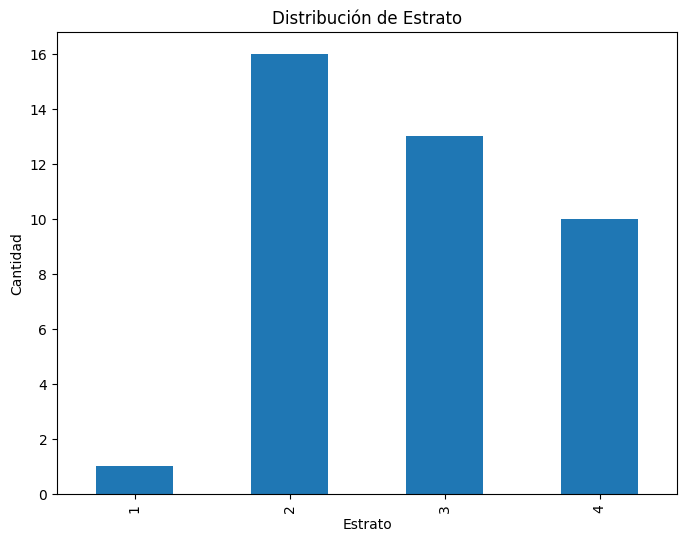

Medellin       18
Itagui          4
Copacabana      3
Sabaneta        3
Bello           3
Envigado        3
La estrella     3
Barbosa         3
Name: Ubicacion, dtype: int64


In [ ]:
# Gráfico de Barras para Estrato
plt.figure(figsize=(8, 6))
dataset['Estrato'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Estrato')
plt.xlabel('Estrato')
plt.ylabel('Cantidad')
plt.show()

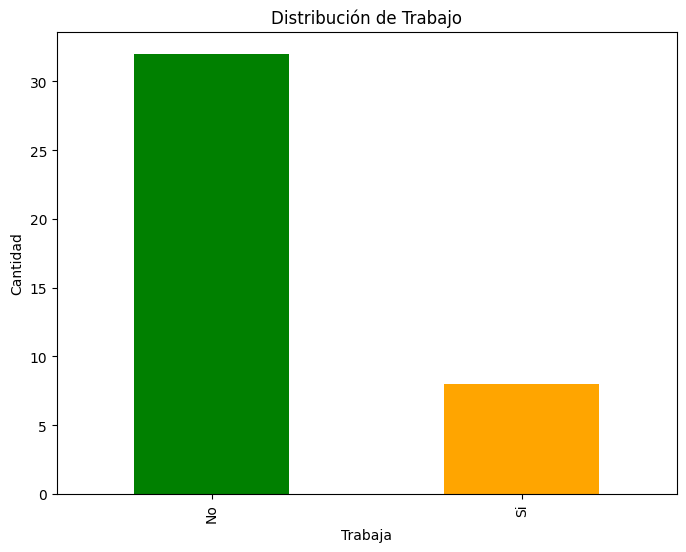

In [ ]:
# Gráfico de Barras para Trabaja
plt.figure(figsize=(8, 6))
dataset['Trabaja'].value_counts().plot(kind='bar', color=['green', 'orange'])
plt.title('Distribución de Trabajo')
plt.xlabel('Trabaja')
plt.ylabel('Cantidad')
plt.show()

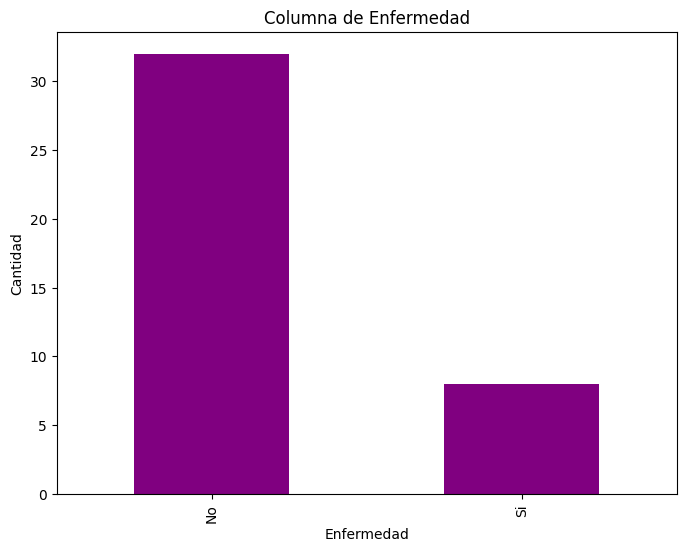

In [ ]:
# Gráfico de Barras para Enfermedad
plt.figure(figsize=(8, 6))
dataset['Enfermedad'].value_counts().plot(kind='bar', color='purple')
plt.title('Columna de Enfermedad')
plt.xlabel('Enfermedad')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
# Gráfico de Barras para Ubicacion
plt.figure(figsize=(10, 6))
dataset['Ubicacion'].value_counts().astype(int).plot(kind='bar', color='green')
plt.title('Distribución de Ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

##***Graficas de pastel***##

In [ ]:
# Gráfico de Pastel de Género (Sexo)
plt.figure(figsize=(8, 6))
dataset['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['cyan', 'pink'])
plt.title('Distribución de Género')
plt.ylabel('')
plt.show()

In [ ]:
# Gráfico de Pastel de Tipo de Colegio
plt.figure(figsize=(8, 6))
dataset['Tipo de Colegio'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange'])
plt.title('Distribución de Tipo de Colegio')
plt.ylabel('')
plt.show()

##***Graficas de relacion (Dispercion, Box Plots y barras)***##

In [ ]:
#primero convertimos los valores decimales (float) a porcentaje
#Entregas completas
dataset['Entregas_Completas'] = dataset['Entregas_Completas'].apply(lambda x: f"{x*100:.0f}%")
#Asistencia
dataset['Asistencia'] = dataset['Asistencia'].apply(lambda x: f"{x*100:.0f}%")

# Gráfico de Dispersión de Asistencia vs. Entregas Completas
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Asistencia'], dataset['Entregas_Completas'], color='blue')
plt.title('Relación entre Asistencia y Entregas Completas')
plt.xlabel('Asistencia')
plt.ylabel('Entregas Completas')
plt.show()

In [ ]:
#Grafico de barras agrupadas de Ubicacion vs Estrato
agrupacion = dataset.groupby(['Ubicacion', 'Estrato']).size().unstack()

ax = agrupacion.plot(kind='bar', figsize=(10, 6))
ax.set_title('Distribución de Estrato por Ubicación')
ax.set_xlabel('Ubicación')
ax.set_ylabel('Cantidad')
ax.legend(title='Estrato')

plt.xticks(rotation=45)
plt.show()

In [ ]:
#Grafico de barras agrupadas de Ubicacion vs Estrato
agrupacion = dataset.groupby(['Ubicacion', 'Tipo de Colegio']).size().unstack()

ax = agrupacion.plot(kind='bar', figsize=(10, 6))
ax.set_title('Distribución de Estrato por Ubicación')
ax.set_xlabel('Ubicacion')
ax.set_ylabel('Cantidad')
ax.legend(title='Tipo de Colegio')

plt.xticks(rotation=45)
plt.show()

In [ ]:
# Diagrama de Box Plots (Bigote)
materias = ['Sistemas', 'Matematicas', 'Ingles', 'Comunicación']

dataset[materias].boxplot()
plt.ylabel('Calificaciones')
plt.title('Distribución de Calificaciones por Materia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#***Descripcion estaistica final***#

In [ ]:
#obtener informacion del dataset
dataset.info()
dataset.describe()

In [ ]:
#Reporte estadistico del dataset
reporte = ProfileReport(dataset)
reporte.to_file(output_file='ReporteFinal.html')

In [ ]:
dataset